In [1]:
from main_sbm import SBM

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig

In [3]:
def generate_graph_bicluster(Sr, Sc, thetas, random_seed = None):
    # Kr = thetas.shape[0]
    # Kc = thetas.shape[1]

    N = np.sum(Sr)

    Hr = []
    c = 0
    for i in Sr:
        for j in range(i):
            Hr += [c]
        c+=1

    Hc = []
    c = 0
    for i in Sc:
        for j in range(i):
            Hc += [c]
        c+=1

    if isinstance(random_seed, int):
        np.random.seed(random_seed)

    X = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            X[i, j] = np.random.binomial(1, thetas[Hr[i], Hc[j]])

    return X

In [4]:
theta = np.array([[0.75, 0.25, 0.25, 0.25],
                  [0.25, 0.75, 0.25, 0.25],
                  [0.25, 0.25, 0.75, 0.25],
                  [0.25, 0.25, 0.25, 0.75]])

Sr = [15, 15, 15, 15]
Sc = [15, 15, 15, 15]

Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=42)

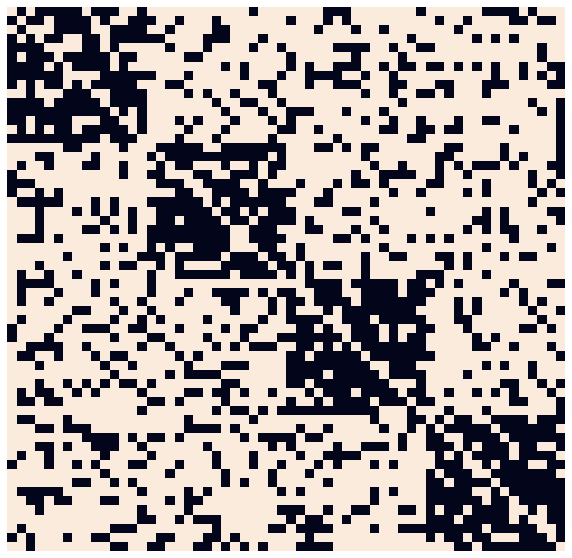

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(X, linewidth=0.0, ax = ax, cbar=False, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
# ax.set_yticks([i*10 for i in range(10)])
# ax.set(xticks=[i*10 for i in range(10)])
# ax.set_xlim([i*10 for i in range(10)])
# ax.set_ylim([i*10 for i in range(10)])
plt.show()

In [6]:
config = {'directed': True,
          'binary': True,
          'unicluster': True}

In [38]:
DP = SBM(config, alpha_PY_r = 10, set_seed=42)

In [39]:
DP.fit(X,5000)

In [40]:
DP.Z[-1]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],


In [29]:
nn = list(DP.idx_list)
nn.remove(0)

Test Bi-cluster

In [21]:
g = ig.Graph.Read_GML('celegansneural.gml')
X = np.array(g.get_adjacency(attribute = "value").data).astype(int)

In [22]:
config = {'directed': True,
          'binary': False,
          'unicluster': True}

In [23]:
w_DP = SBM(config, alpha_PY_r=1, set_seed=42)

In [24]:
w_DP.fit(X,2000)

In [25]:
Z = w_DP.Z

In [26]:
def retrieve_samples(Z, gap = 25, burn_in = True):
    if burn_in == True:
        burn_in = len(Z)//2   
    return Z[burn_in::gap]

def cluster_summs(Z, ret = False):
    temp_Z = []
    mean_lenght = 0
    mean_nodes = 0
    for i in range(len(Z)):
        current_z = np.sum(Z[i], 0)
        temp_Z.append(current_z)
        mean_lenght += len(current_z)
        mean_nodes += np.mean(current_z)

    mean_lenght /= len(Z)
    mean_nodes /= len(Z)

    print('mean number of clusters', mean_lenght)
    print('mean nodes per cluster', mean_nodes)
    if ret:
        return temp_Z

In [27]:
sample = retrieve_samples(Z)
print(cluster_summs(Z[250:]))

mean number of clusters 10.968
mean nodes per cluster 27.203665620094323
None


In [28]:
w_DP_1 = SBM(config, alpha_PY_r=1, set_seed=42)
w_DP_1.fit(X,200)

In [32]:
Z = w_DP.Z
sample = retrieve_samples(Z)
print(cluster_summs(sample))

mean number of clusters 11.25
mean nodes per cluster 26.55
None


In [33]:
w_DP_2 = SBM(config, alpha_PY_r=3, set_seed=42)
w_DP_2.fit(X,200)
Z = w_DP_2.Z
sample = retrieve_samples(Z)
print(cluster_summs(Z[int(len(Z)/2):]))

mean number of clusters 12.81
mean nodes per cluster 23.335652472527464
None
